<a href="https://colab.research.google.com/github/SolbiChoi/TeamProject/blob/master/fashion_good.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install konlpy wordcloud

In [ ]:
import pandas as pd
from konlpy.tag import Okt, Komoran, Kkma, Hannanum, Twitter, Mecab
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

In [ ]:
text = pd.read_excel('./fashion_scraping.xlsx')
grade_4 = text['star grade'] >= 4.0

df_grade4 = text[grade_4]
df_grade4['star grade'].value_counts()

df_grade4.head(10)

,star grade,review
0,5.0,가성비 굿이에요~ 남친이랑 커플로 맞췄눈데 노트묵 가방으로 잘 쓰고 있습니다^^
1,4.5,가성비 굿 잘 매고다닙니다
2,5.0,가격 말도안되고 퀄리티 질 튼튼함 다 최고인듯.\n이가격에 이만한 가방 절대못구하지.
3,4.0,가격을 생각한다면 만족 스러운 제품입니다.
4,4.5,가볍게 들고 다니기에 추천합니다. 겉보다 안은 조금 싼티가 나서 아쉽...
5,5.0,여행갈때 가볍게 잘 쓰고 있어요~
6,5.0,진짜 잘 쓰고 다닌 가방
7,5.0,너무 잘 쓰고 있습니다. 사실 배낭어깨끈이 무게 때문제 찢어져서 이 부분을 잘 보강...
8,5.0,서브 백팩으로 잘 사용하고 있습니다.
9,5.0,가볍고 뚱뚱하지 않아 남들에게 피해가 가지도 않아 좋네요 ..\n아쉬운 것은 수납이...


In [ ]:
x_data = text['review']
y_data = text['star grade']

In [ ]:
def make_y_data(val):
    if (1 <= val < 2):
        return 1
    elif (2 <= val < 3):
        return 2
    elif (3 <= val < 4):
        return 3
    elif (4 <= val < 5):
        return 4
    elif (5 <= val < 6):
        return 5
    else:
        return None

In [ ]:
y_data = y_data.apply(lambda val:make_y_data(val))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5877,), (5877,), (1959,), (1959,))

In [ ]:
!curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5064  100  5064    0     0   170k      0 --:--:-- --:--:-- --:--:--  170k


In [ ]:
!bash ./mecab.sh

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [ ]:
x_train.str.replace('[^가-힣ㄱ-ㅎㅠ ]','')

2545                        이렇게 공부하고 써야하는거면 이걸 왜 사는지그냥 사죠
2787    저는 운동하는 사람 치고 얼굴이 작다는 말을 듣는 두상의 소유자입니다 전투모 호 정...
3951    월말이면 받겠거니 생각하고 느긋하게 기다렸는데 대략 월 일쯤 펀딩한 것 같고 오늘 ...
1658    티셔츠 성애자로써 티셔츠좀 입어봐능데 이거 정말 장인정신이 느껴짐 일단 핏이 어깨선...
4430    가격대비 좋습니다 다만 다른분들 처럼 두 세번 입고 소매가하얗게 일어났습니다가성비에...
                              ...                        
2029    디자인과 기능적인 면 모두 만족스럽습니다 다만 안 벗겨지는 반면 운동화 같은 신발 ...
91       가성비가 뛰어난 편입니다 일부 마감이나 검수가 미흡하나 크게 흠잡을정도는 아닙니다...
1267                                  진짜 쓸모없어요 개샀는데 돈버렸네요
7665    너무 잘 떨어집니다 딱 붙는 옷에 끼우는 수준으로 입어야 안떨어져요정말 팔면 안되는 상품
590     너무 멋집니다 간지 난다고 해야하나요 암튼 그렇구요사이즈가 크게 나왔다고 해서 걱정...
Name: review, Length: 5877, dtype: object

In [ ]:
from konlpy.tag import Mecab
mecab = Mecab()

In [ ]:
stopwords = ['의', '은', '는', '이', '있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '사람', '주', '아니', '등', '같', '우리'
, '때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇', '위하', '때문', '그것', '두', '말하', '알', '그러나'
, '받', '못하', '일', '그런', '또', '문제', '더', '사회', '많', '그리고', '좋', '크', '따르', '중', '나오', '가지', '씨'
, '시키', '만들', '지금', '생각하', '그러', '속', '하나', '집', '살', '모르', '적', '월', '데', '자신', '안', '어떤', '내'
, '경우', '명', '생각', '시간', '그녀', '다시', '이런', '앞', '보이', '번', '나', '다른', '어떻', '여자', '개', '전', '들'
, '사실', '이렇', '점', '싶', '말', '정도', '좀', '원', '잘', '통하', '소리', '놓', '걍', '과', '를', '으로', '자', '에', '와', '한', '하다']

In [ ]:
import pickle
pickle.dump(stopwords, open('./stopwords.pkl','wb'))

In [ ]:
sentence = list()

for tok in x_train:
  encoded = mecab.morphs(tok)
  sentence.append([item for item in encoded if item not in stopwords])

sentence

In [ ]:
import tensorflow as tf
tokenizer = tf.keras.preprocessing.text.Tokenizer()

In [ ]:
tokenizer.fit_on_texts(sentence)

In [ ]:
text = tokenizer.word_index

In [ ]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords

In [ ]:
%matplotlib inline 
import matplotlib 
from IPython.display import set_matplotlib_formats 
matplotlib.rc('font',family = 'Malgun Gothic') 
set_matplotlib_formats('retina') 
matplotlib.rc('axes',unicode_minus = False)

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(
font_path = './NanumGothicExtraBold.ttf', background_color='white',
colormap = "hot", width=3000, height=2000).generate_from_frequencies(text)

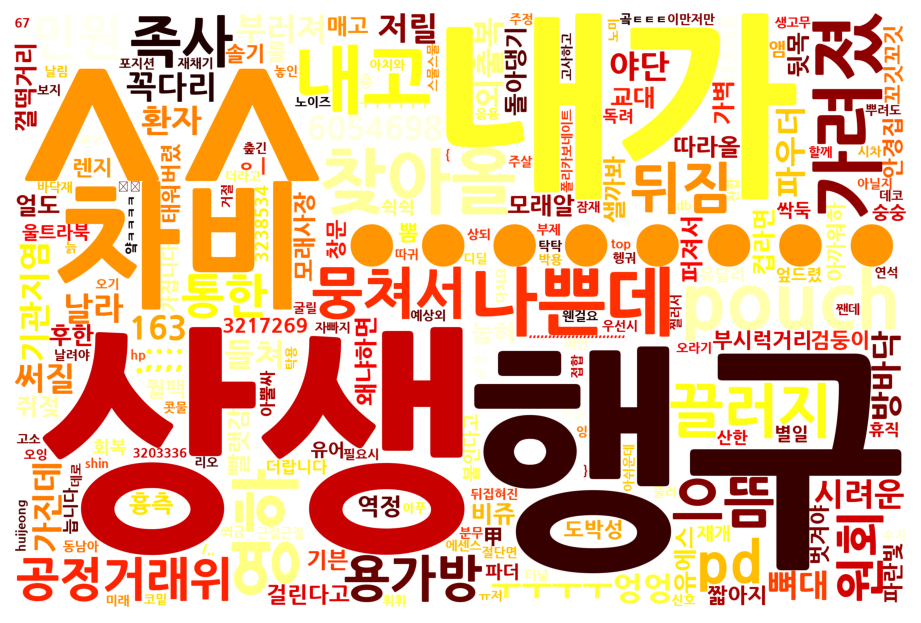

In [ ]:
plt.imshow(wordcloud) 

figure = plt.gcf() # get current figure
figure.set_size_inches(8, 6)
plt.axis('off') 
plt.show()